# Covid Data Analysis

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Reading the data

In [2]:
covid_df=pd.read_excel(r'Covid_Dataset_new.xlsx')
covid_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,1,1,0,0,0,Yes,male,Other,negative
1,0,0,0,0,0,No,male,Other,positive
2,0,0,0,0,0,Yes,female,Other,negative
3,1,0,0,0,0,No,male,Abroad,negative
4,0,0,0,0,0,Yes,male,Other,positive


In [3]:
covid_df.shape

(2137, 9)

**The shape of the data is shows me that there are 2137  rows and 9 columns columns in the given data.**

In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cough                2137 non-null   int64 
 1   fever                2137 non-null   int64 
 2   sore_throat          2137 non-null   int64 
 3   shortness_of_breath  2137 non-null   int64 
 4   head_ache            2137 non-null   int64 
 5   age_60_and_above     2137 non-null   object
 6   gender               2121 non-null   object
 7   test_indication      2137 non-null   object
 8   corona_result        2137 non-null   object
dtypes: int64(5), object(4)
memory usage: 150.4+ KB


In [5]:
## We can see that our data have both integer and categorical value

In [6]:
covid_df.describe() # numerical column info

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,0.419747,0.273280,0.038372,0.037436,0.058493
std,0.493633,0.445748,0.192137,0.189871,0.234729
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
covid_df.isnull().sum()

cough                   0
fever                   0
sore_throat             0
shortness_of_breath     0
head_ache               0
age_60_and_above        0
gender                 16
test_indication         0
corona_result           0
dtype: int64

In [8]:
covid_df['gender'].fillna(0, inplace = True)

In [9]:
covid_df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_60_and_above       0
gender                 0
test_indication        0
corona_result          0
dtype: int64

In [10]:
#Replace yes and no entries in target to 1 and 0 repsectively
covid_df=covid_df.replace({'age_60_and_above':{'Yes':1, 'No':0}})
covid_df=covid_df.replace({'gender':{'male':1, 'female':0}})
covid_df=covid_df.replace({'test_indication':{'Other':0, 'Abroad':1, 'Contact with confirmed':2}})

In [11]:
covid_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,1,1,0,0,0,1,1,0,negative
1,0,0,0,0,0,0,1,0,positive
2,0,0,0,0,0,1,0,0,negative
3,1,0,0,0,0,0,1,1,negative
4,0,0,0,0,0,1,1,0,positive


### EDA

In [16]:
covid_df["corona_result"].value_counts()

corona_result
positive    1105
negative    1032
Name: count, dtype: int64

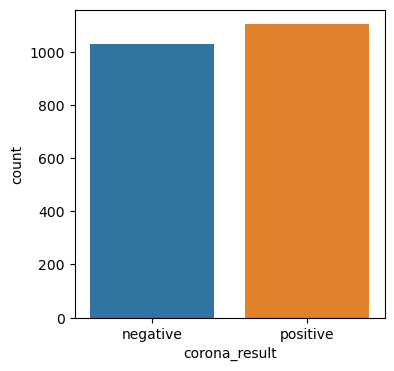

In [17]:
plt.figure(figsize=(4, 4))
sns.countplot(x='corona_result', data=covid_df)
plt.show()

Text(0.5, 1.0, 'Covid result across cough')

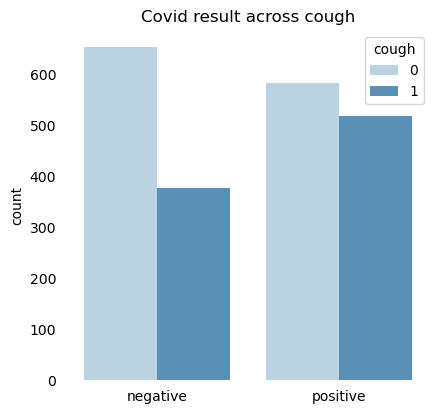

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(x=covid_df['corona_result'], hue=covid_df['cough'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Covid result across cough')

Text(0.5, 1.0, 'Covid result across fever')

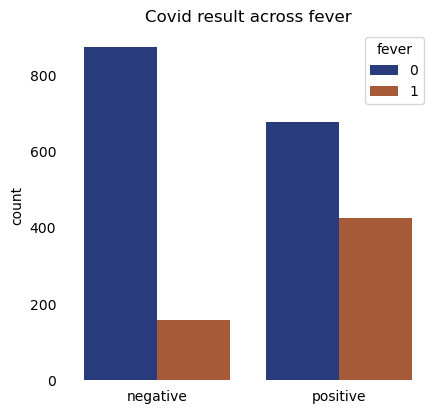

In [19]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(x=covid_df['corona_result'], hue=covid_df['fever'], palette='dark', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Covid result across fever')

Text(0.5, 1.0, 'Covid result across sore_throat')

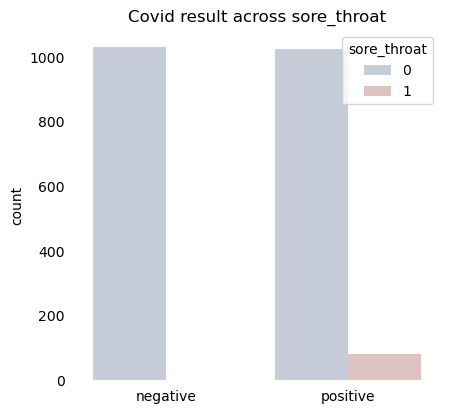

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(x=covid_df['corona_result'], hue=covid_df['sore_throat'], palette='vlag', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Covid result across sore_throat')

Text(0.5, 1.0, 'Covid result across shortness_of_breath')

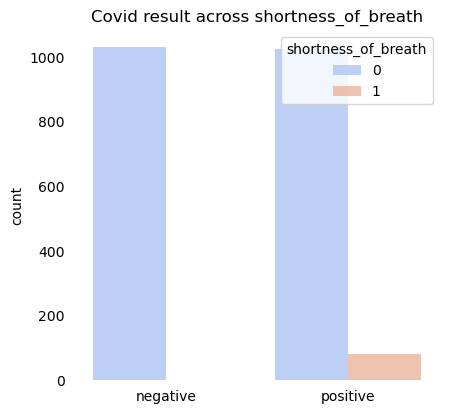

In [21]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(x=covid_df['corona_result'], hue=covid_df['shortness_of_breath'], palette='coolwarm', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Covid result across shortness_of_breath')

Text(0.5, 1.0, 'Covid result across head_ache')

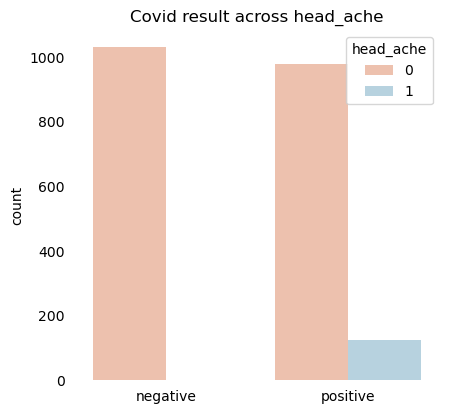

In [22]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(x=covid_df['corona_result'], hue=covid_df['head_ache'], palette='RdBu', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Covid result across head_ache')

Text(0.5, 1.0, 'Covid result across age_60_and_above')

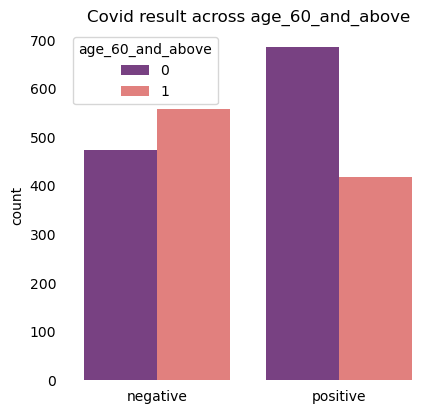

In [23]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(x=covid_df['corona_result'], hue=covid_df['age_60_and_above'], palette='magma', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Covid result across age_60_and_above')

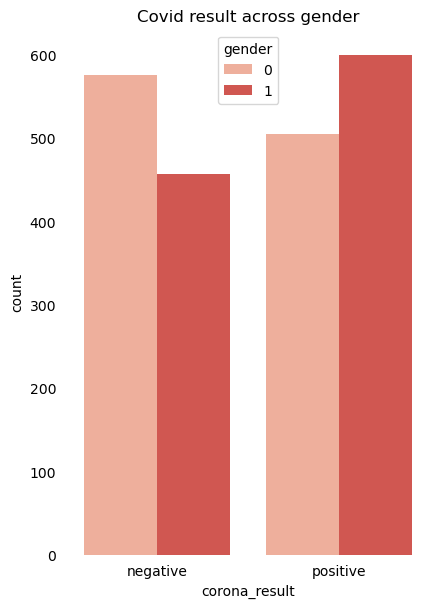

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,15))
plt.subplot(2,3,1)
sns.countplot(x=covid_df['corona_result'], hue=covid_df['gender'], palette='Reds', alpha=0.9)  # Change 'red' to 'Reds'
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.title('Covid result across gender')
plt.show()

In [25]:
#Replace Positive and Negative entries in target to 1 and 0 repsectively

covid_df=covid_df.replace({'corona_result':{'negative':0, 'positive':1}})

## Correlation Matrix

<Axes: >

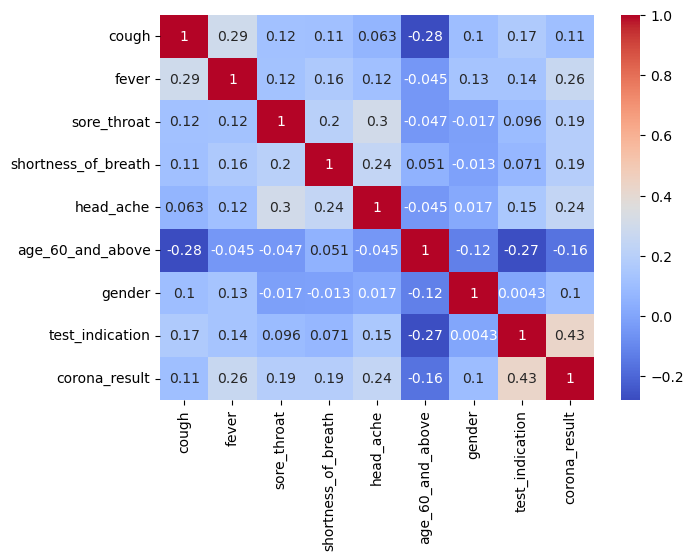

In [26]:
plt.figure(figsize=(7, 5))
corr = covid_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [27]:
# Setting features 

X = covid_df.drop(columns=['corona_result'])  # Features
y = covid_df['corona_result']  # Target variable
print(y.shape)
print(X.shape)

(2137,)
(2137, 8)


## Model

In [28]:
# Separating Independent and Label data

print(f"Shape of Independent Data :{X.shape}")
print(f"Shape of Label Data :{y.shape}")

# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of Independent Data :(2137, 8)
Shape of Label Data :(2137,)
Shape of X_train is (1923, 8)
Shape of y_train is (1923,)
Shape of X_test is (214, 8)
Shape of y_test is (214,)


In [29]:
# Creating a function that trains, predicts and returns accuracy, recall confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def Train_Predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Confusuion Matrix")

    cfm = confusion_matrix(y_test,y_pred)
    print(cfm)
    print("===================================================")
    print("Classification report")

    print(classification_report(y_test,y_pred))

    print("====================================================")
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy of the model: ", acc)

    return y_pred

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.705607476635514


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[82 21]
 [42 69]]
Classification report: 
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       103
           1       0.77      0.62      0.69       111

    accuracy                           0.71       214
   macro avg       0.71      0.71      0.70       214
weighted avg       0.72      0.71      0.70       214

Accuracy of the model:  0.705607476635514


### Threshold Adjustment

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred_proba = model.predict_proba(X_test)
#y_pred_proba

In [34]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_proba[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 65  , type 2 error : 35  , type 1 error: 30
Errors at threshold  0.41000000000000003 : 65  , type 2 error : 35  , type 1 error: 30
Errors at threshold  0.42000000000000004 : 65  , type 2 error : 35  , type 1 error: 30
Errors at threshold  0.43000000000000005 : 67  , type 2 error : 37  , type 1 error: 30
Errors at threshold  0.44000000000000006 : 69  , type 2 error : 39  , type 1 error: 30
Errors at threshold  0.45000000000000007 : 69  , type 2 error : 39  , type 1 error: 30
Errors at threshold  0.4600000000000001 : 63  , type 2 error : 42  , type 1 error: 21
Errors at threshold  0.4700000000000001 : 63  , type 2 error : 42  , type 1 error: 21
Errors at threshold  0.4800000000000001 : 63  , type 2 error : 42  , type 1 error: 21
Errors at threshold  0.4900000000000001 : 63  , type 2 error : 42  , type 1 error: 21
Errors at threshold  0.5000000000000001 : 63  , type 2 error : 42  , type 1 error: 21
Errors at threshold  0.5100000000000001 : 63  , type 2 error : 4

In [35]:
y_pred_class=[]
for value in y_pred_proba[:,1]:
    if value>0.4 :
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [36]:
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
print("=====================================================")
print("Classification report: ")

print(classification_report(y_test,y_pred_class))

print("=====================================================")
acc=accuracy_score(y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[73 30]
 [35 76]]
Classification report: 
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       103
           1       0.72      0.68      0.70       111

    accuracy                           0.70       214
   macro avg       0.70      0.70      0.70       214
weighted avg       0.70      0.70      0.70       214

Accuracy of the model:  0.6962616822429907


### Decision Tree

In [37]:
Decision_Tree_Classifier = DecisionTreeClassifier()
Train_Predict(Decision_Tree_Classifier, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[92 11]
 [29 82]]
Classification report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       103
           1       0.88      0.74      0.80       111

    accuracy                           0.81       214
   macro avg       0.82      0.82      0.81       214
weighted avg       0.82      0.81      0.81       214

Accuracy of the model:  0.8130841121495327


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

### Pruning Decision Tree

In [38]:
#predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier


model_DecisionTree = DecisionTreeClassifier(criterion='gini', 
                                            random_state =12, 
                                            splitter='best', 
                                            min_samples_leaf = 3, 
                                            min_samples_split = 6, 
                                            max_depth = 10)

# splitter :- default value of splitter is best it will take the best value which will make best homoginas node and other value is random it will pick random number
# min_samples_leaf :- make the leaf only if there are 3 or more the 3 observation :-value passed is 3 :-3 sample in dt
# min_samples_split :- if node has minimum 6 observation then on splet that node :- value passed is 6 :- 6 sample in dt
# max_depth :- max nodes/leaf in the tree :- the depth of tree will be 10 :- value passed is 10

#fit the model ion the data and predict the values

model_DecisionTree.fit(X_train,y_train)
Y_pred = model_DecisionTree.predict(X_test)

#print(Y_pred)
#print(list(zip(y_test,Y_pred)))

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print("===================================================")

print("Classification report: ")

print(classification_report(y_test,Y_pred))

print("===================================================")
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[83 20]
 [19 92]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       103
           1       0.82      0.83      0.83       111

    accuracy                           0.82       214
   macro avg       0.82      0.82      0.82       214
weighted avg       0.82      0.82      0.82       214

Accuracy of the model:  0.8177570093457944


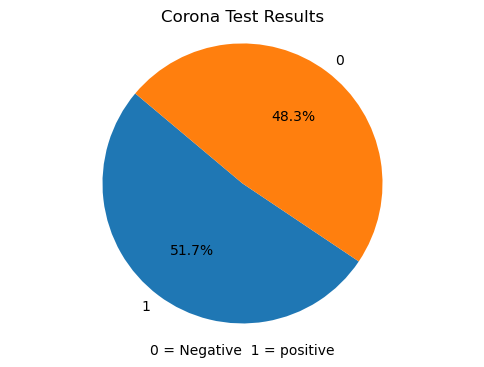

In [40]:
# Count the occurrences of each value in the 'corona_result' column
result_counts = covid_df['corona_result'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Corona Test Results')
plt.xlabel('0 = Negative  1 = positive')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Evaluation Metrics Table

<head>
    <style>
        table td {
            text-align:center;
            }
    </style>
</head>
<body>
        <table>
            <thead>
                <tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
                    <th>LogisticRegression</th>
                    <th>DecisionTree</th>
                <th>PruningDecisionTree</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>Accuracy</td>
                    <td>-</td>
                    <td>70.56%</td>
                    <td>81.30%</td>
                    <td>81.77%</td>
                </tr>
                <tr>
                    <td>Precision</td>
                    <td>class 0</td>
                    <td>0.66</td>
                    <td>0.76</td>
                    <td>0.81</td>
                </tr>
                <tr>
                    <td>-</td>
                    <td>class 1</td>
                    <td>0.77</td>
                    <td>0.88</td>
                    <td>0.82</td>
                </tr>
                <tr>
                    <td>Recall</td>
                    <td>class 0</td>
                    <td>0.80</td>
                    <td>0.71</td>
                    <td>0.81</td>
                </tr>
                <tr>
                    <td>-</td>
                    <td>class 1</td>
                    <td>0.62</td>
                    <td>0.68</td>
                    <td>0.83</td>
                </tr>
                <tr>
                    <td>F1-Score</td>
                    <td>class 0</td>
                    <td>0.72</td>
                    <td>0.69</td>
                    <td>0.81</td>
                </tr>
                <tr>
                    <td>-</td>
                    <td>class 1</td>
                    <td>0.69</td>
                    <td>0.70</td>
                    <td>0.83</td>
                </tr>
            </tbody>
        </table>
</body>